Text(0.5, 1.0, 'График 1. Соотношение ушедших и лояльных клиентов')

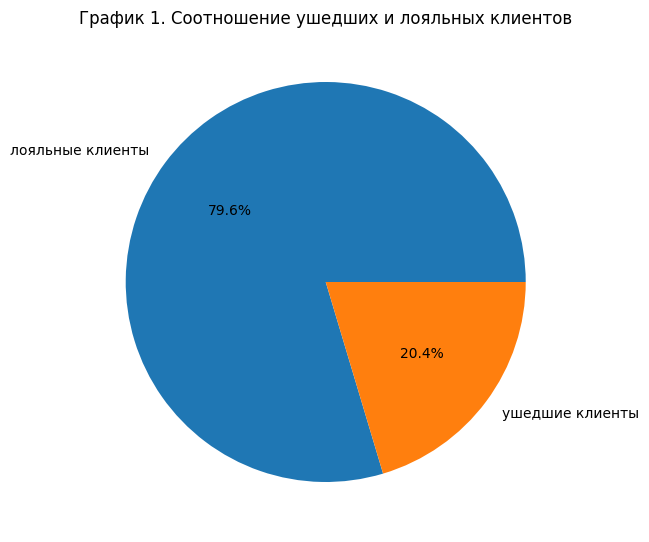

In [66]:
#9.1. Каково соотношение ушедших и лояльных клиентов? 
# Покажите это на графике и дайте комментарий по соотношению.
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
import matplotlib.pyplot as plt
%matplotlib inline

churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(["RowNumber", "CustomerId"], axis=1) #убираем лишние столбцы
clients_ratio = churn_data["Exited"].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients_ratio,
    labels= ["лояльные клиенты", "ушедшие клиенты"],
    autopct='%.1f%%',
    explode = [0, 0]
)
axes.set_title("График 1. Соотношение ушедших и лояльных клиентов")


Вывод: количество ушедших клиентов составляет около 1/5 от всех клиентов банка. Это довольно высокий показатель, необходимо выяснить его причину.

Вывод: Зависимость количества пользователей от суммы накоплений постоянно растет приблизительно до 125 тыс,потом постоянно снижается. Наибольшее количество пользователей имеет сбережения от 100 до 150 тыс.


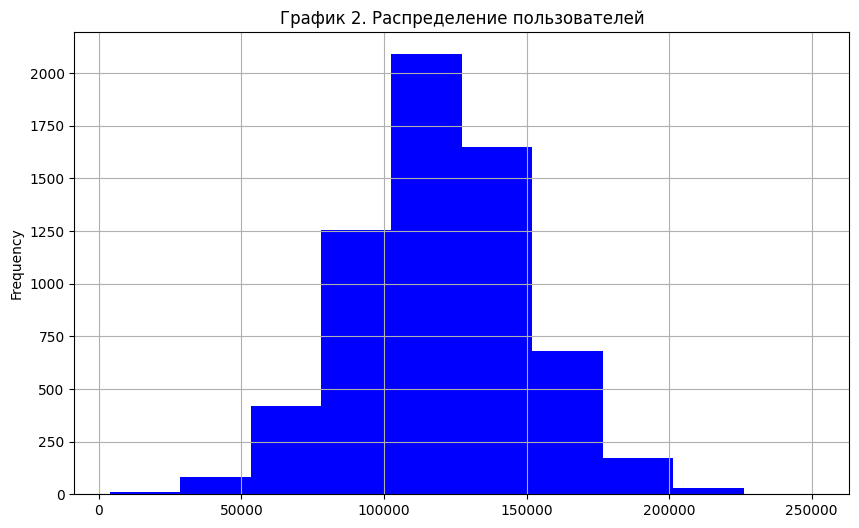

In [52]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
# Опишите распределение и сделайте выводы.  
top_clients_balance = churn_data[churn_data["Balance"] > 2500]
top_clients_balance["Balance"].plot(
    kind='hist',
    figsize=(10, 6),
    title ='График 2. Распределение пользователей',
    ylabel ='Количество пользователей',
    grid = True,
    color = 'blue',
    bins=10)


Вывод: Зависимость количества пользователей от суммы накоплений постоянно растет приблизительно до 125 тыс, 
      затем постоянно снижается. Наибольшее количество пользователей имеет сбережения от 100 до 150 тыс.

Вывод: средний баланс ушедших клиентов больше, чем у лояльных. Возможно, предлагаются невыгодные ставки для сумм больше 70 тыс.


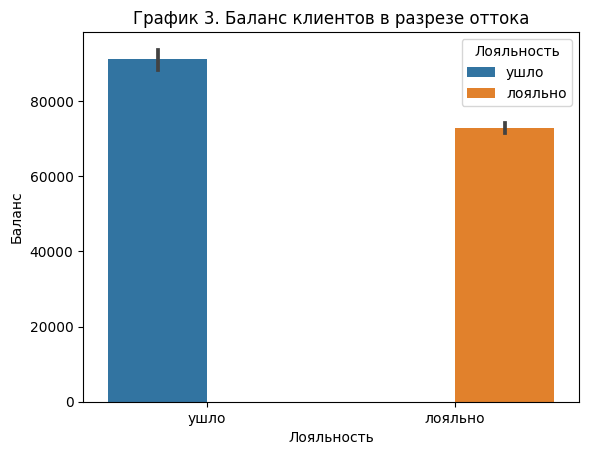

In [53]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.rename(columns = {"Exited" : "Лояльность"})
churn_data["Лояльность"] = np.where(churn_data["Лояльность"] == 1, "ушло", "лояльно")
barplot = sns.barplot(
    data=churn_data[["Balance", "Лояльность"]],
    x= 'Лояльность',
    y = "Balance",
    hue='Лояльность'
)
barplot.set(title ='График 3. Баланс клиентов в разрезе оттока'),
barplot.set(ylabel = "Баланс")


Вывод: средний баланс ушедших клиентов больше, чем у лояльных. Возможно, предлагаются невыгодные ставки для сумм больше 70 тыс.

Выводы: наиболее лояльны клиенты в возрасте от 30 до 40 лет. Средний возраст ухода из банка 45 лет. Банку стоит обратить внимание на эту возрастную категорию. Наибольшее число выбросов у категории лоялных клиентов. Скорее всего, это связано с продолжительностью жизни.


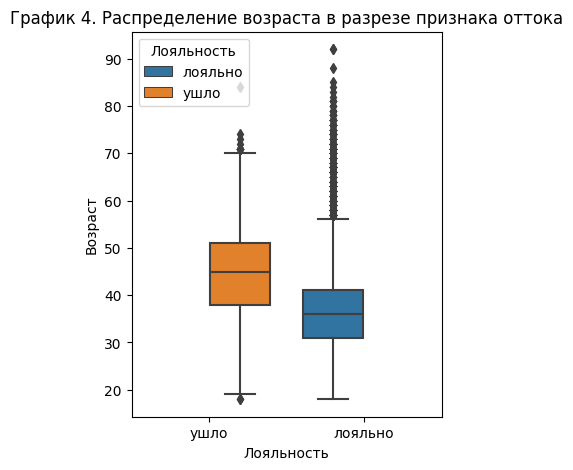

In [54]:
#Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.rename(columns = {"Exited" : "Лояльность", "Age" : "Возраст"}) #переименовываем столбцы
churn_data["Лояльность"] = np.where(churn_data["Лояльность"] == 1, "ушло", "лояльно") #переименовываем параметры в столбце "Лояльность"
hue_order = ["лояльно", "ушло"] #задаем порядок вывода на графике
fig, ax = plt.subplots(figsize=(4, 5)) #задаем размер графика
ax.set_title("График 4. Распределение возраста в разрезе признака оттока")
sns.boxplot(data=churn_data[["Возраст", "Лояльность"]],
    x = 'Лояльность',
    y = "Возраст", hue = 'Лояльность', hue_order = hue_order, ax=ax   
)


Выводы: наиболее лояльны клиенты в возрасте от 30 до 40 лет. Средний возраст ухода из банка 45 лет. Банку стоит обратить внимание на эту возрастную категорию. Наибольшее число выбросов у категории лоялных клиентов. Скорее всего, это связано с продолжительностью жизни.

#Вывод: явная взаимосвязь не прослеживается. Самый низкий кредитный рейтинг (менее 400) у части ушедших клиентов.


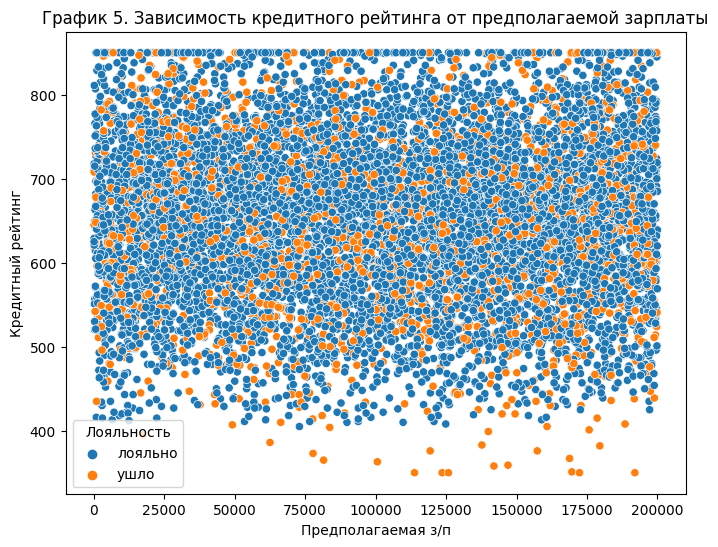

In [55]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. 
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. 
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.rename(columns = {"Exited" : "Лояльность", "EstimatedSalary" : "Предполагаемая з/п", 
                                          "CreditScore": "Кредитный рейтинг"}) #переименовываем столбцы
churn_data["Лояльность"] = np.where(churn_data["Лояльность"] == 1, "ушло", "лояльно") #переименовываем параметры в столбце "Лояльность"
hue_order = ["лояльно", "ушло"] #задаем порядок вывода на графике
fig, ax = plt.subplots(figsize=(8, 6)) #задаем размер графика
ax.set_title("График 5. Зависимость кредитного рейтинга от предполагаемой зарплаты")
sns.scatterplot(data=churn_data[["Кредитный рейтинг", "Предполагаемая з/п", "Лояльность"]],
                 x = "Предполагаемая з/п", y = "Кредитный рейтинг", hue = "Лояльность", hue_order = hue_order, ax=ax)


Вывод: явная взаимосвязь не прослеживается. Самый низкий кредитный рейтинг (менее 400) у части ушедших клиентов.

Вывод: женщины уходят в три раза чаще


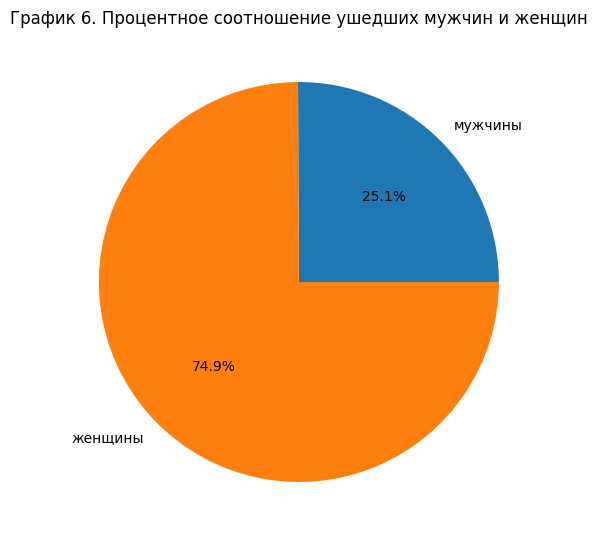

In [56]:
churn_data = pd.read_csv('data/churn.csv')
female_rate = round(churn_data[churn_data["Gender"] == "Female"]["Exited"].mean()*100, 2) #Процент ушедших клиентов среди женщин
male_rate = 100 - female_rate #Процент ушедших клиентов среди мужчин
clients_ratio = [female_rate, male_rate]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title("График 6. Процентное соотношение ушедших мужчин и женщин")
axes.pie(
    clients_ratio,
    labels= ["мужчины", "женщины"],
    autopct='%.1f%%',
    explode = [0, 0]
)


Вывод: женщины уходят в три раза чаще

Вывод: отток клиентов не зависит от числа приобретенных услуг


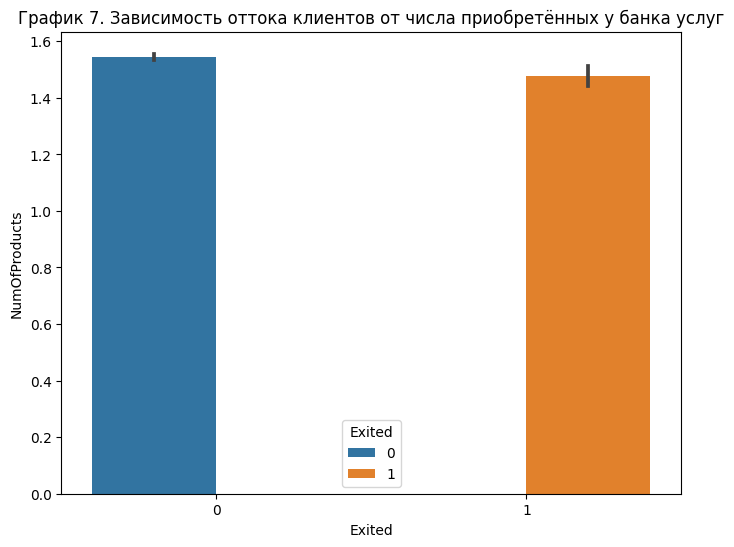

In [57]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
fig, ax = plt.subplots(figsize=(8, 6)) #задаем размер графика
ax.set_title("График 7. Зависимость оттока клиентов от числа приобретённых у банка услуг")
sns.barplot(data=churn_data[["NumOfProducts", "Exited"]],
                 x = "Exited", y = "NumOfProducts",
 hue = "Exited", ax=ax)


Вывод: отток клиентов не зависит от числа приобретенных услуг

Вывод: ушло относительно много клиентов со статусом активен. Это настораживает. Нужно проанализировать причину их ухода.


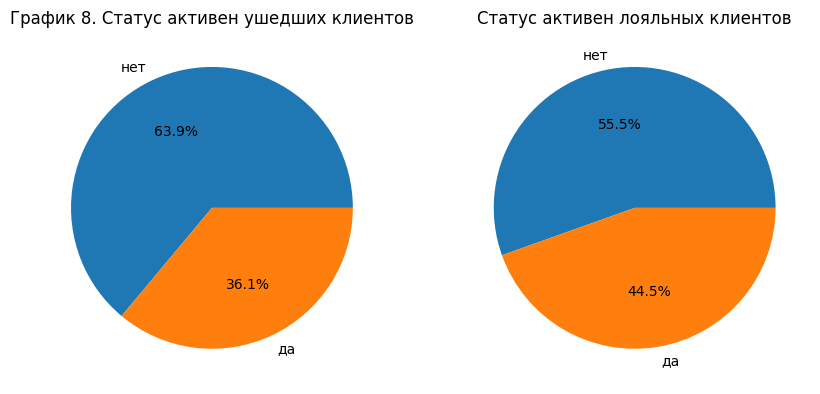

In [59]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
clients_ratio_1 = churn_data[churn_data["Exited"]==1]["IsActiveMember"].value_counts()
axes[0].pie(
    clients_ratio_1,
    labels= ["нет", "да"],
    autopct='%.1f%%',
    explode = [0, 0]
)
axes[0].set_title("График 8. Статус активен ушедших клиентов")
clients_ratio_0 = churn_data[churn_data["Exited"]==0]["IsActiveMember"].value_counts()
axes[1].pie(
    clients_ratio_0,
    labels= ["нет", "да"],
    autopct='%.1f%%',
    explode = [0, 0])
axes[1].set_title("Статус активен лояльных клиентов")


Вывод: ушло относительно много клиентов со статусом "активен". Это настораживает.  
 Нужно проанализировать причину их ухода.

In [61]:
#9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, 
# которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.
country_exited = churn_data.groupby(
    by='Geography')["Exited"].agg(['sum', "count"]).reset_index() #группируем по странам, вычисляем общее количество клиентов и количество ушедших

country_exited["rate"] = round(country_exited["sum"]/country_exited["count"]*100, 2) #добавляем столбец с долей ушедших клиентов
import plotly.express as px
fig = px.choropleth(
    data_frame=country_exited, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="rate", #от чего зависит цвет
    range_color=[0, 40], #диапазон цвета
    title='График 9. Доля ушедших клиентов', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

fig.show()


Вывод: больше всего клиентов ушло в Германии. Вероятно, там есть более привлекательные предложения

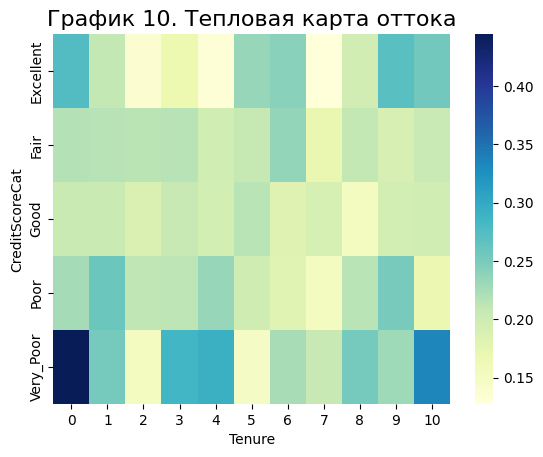

In [65]:
#9.10. Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data["CreditScoreCat"] = churn_data["CreditScore"].apply(get_credit_score_cat)
#Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
piv_tb = churn_data.pivot_table(values="Exited",
                                index="CreditScoreCat", columns="Tenure", aggfunc="mean", fill_value=0)

heatmap = sns.heatmap(data=piv_tb, cmap='YlGnBu')
heatmap.set_title('График 10. Тепловая карта оттока', fontsize=16);
#На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.


Вывод: Чаще всего уходят клиенты с очень низким кредитным рейтингом. Среди них лидируют клиенты, недавно пришедшие в банк. 

Следующая по количеству оттока категория - клиенты с очень низким кредитным рейтингом, которые обслуживаются в банке 10 лет. 

Также следует обратить  внимание на клиентов с высоким кредитным рейтингом 0-го и 9-,10-го года.

Общий вывод: Большая чать ушедших клиентов - женщины. Больше всего клиентов ушло в Германии. Уходит много клиентов со статусом "активен". Отток не зависит от количества приобретенных услуг и кредитного рейтинга.